In [8]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from pyramid.arima import auto_arima

from Sloth import Sloth
Sloth = Sloth()

In [9]:
# read in different datasets

# electronic production data
data_electronic = pd.read_csv("datasets/Electronic_Production.csv",index_col=0)
data_electronic.index = pd.to_datetime(data_electronic.index)

# Beijing temperature data
data_temp = pd.read_csv("datasets/PRSA_data_2010.1.1-2014.12.31.csv",index_col=0)
data_temp = data_temp.groupby(['year', 'month']).mean()
data_temp = data_temp['TEMP']

# sunspots data
data_sun = pd.read_csv("datasets/learningData.csv",index_col=0)
data_sun = data_sun['sunspot.month'].dropna()

# chlorine concentration data
data_chl = pd.read_csv("datasets/0000_train_ts.csv",index_col=0)



In [42]:
# function that plots time series data
# parameters:
#     input_data:                input data frame to plot
#     title:                     string to represent time series data, to be used as title / ylabel

def plot_data(input_data, title):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.plot(input_data.values, "k-")
    plt.xlabel("data point index")
    plt.ylabel(title)
    plt.title(title)
 
# function that plots time series seasonal decomposition
# parameters:
#     input_data:                input data frame 
#     frequency:                 frequency, or periodicity, of the time series
def plot_seasonal(input_data, *frequency):
    if not frequency:
        result = Sloth.DecomposeSeriesSeasonal(input_data.index, input_data.values)
    else:
        result = Sloth.DecomposeSeriesSeasonal(input_data.index, input_data.values, frequency)
    fig = result.plot()
    plt.show()

# function that makes a future forecast for time series data
# parameters:
#     input_data:                input data frame 
#     seasonal:                  boolean; whether data has seasonal component
#     seasonal_differencing      period for seasonal differencing

def future_forecast(input_data, seasonal, *seasonal_differencing):
    
    # use 80% of data as training data
    train_split = int(.8 * len(input_data))
    train = input_data[:train_split]
    test = input_data[train_split:]
    
    print("DEBUG::the size of test is:")
    print(test.shape)
    
    if not seasonal_differencing:
        future_forecast = Sloth.PredictSeriesARIMA(train,test.shape[0],seasonal)
    else:
        future_forecast = Sloth.PredictSeriesARIMA(train,test.shape[0],seasonal, seasonal_differencing)

    print("DEBUG::Future forecast:")
    print(future_forecast)

    future_forecast = pd.DataFrame(future_forecast,index = test.index, columns=["Prediction"])
    return future_forecast


# function that plots time series data
# parameters:
#     input_data:                input data frame to plot
#     future_forecast:           future forecast for time series data
#     title:                     string to represent time series data, to be used as title / ylabel
def plot_future_forecast(input_data, future_forecast, title):
    train_split = int(.8 * len(input_data))
    test = input_data[train_split+1:]
    plt.subplot(2, 1, 1)
    plt.plot(pd.concat([test,future_forecast],axis=1).values)
    plt.xlabel("data point index")
    plt.ylabel(title)
    plt.title(title)

    plt.subplot(2, 1, 2)
    plt.plot(pd.concat([input_data,future_forecast],axis=1).values)
    plt.xlabel("data point index")
    plt.ylabel(title)
    plt.show()
        

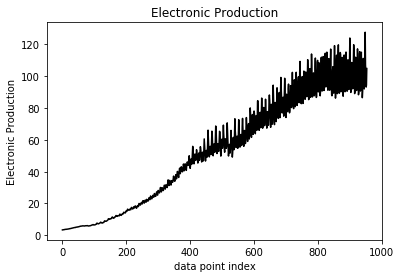

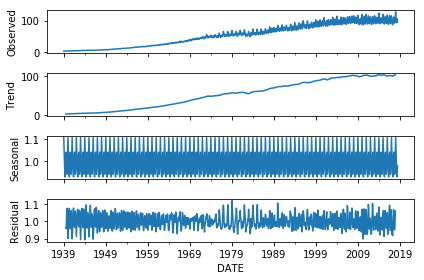

DEBUG::the size of test is:
(191, 1)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2452.673, BIC=2475.774, Fit time=5.316 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2792.031, BIC=2801.271, Fit time=0.059 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2640.955, BIC=2659.436, Fit time=1.009 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2541.226, BIC=2559.706, Fit time=1.323 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2454.341, BIC=2482.061, Fit time=5.638 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2671.983, BIC=2690.463, Fit time=2.676 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=2454.192, BIC=2481.913, Fit time=12.792 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2454.291, BIC=2486.631, Fit time=25.105 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2444.747, BIC=2472.467, Fit time=7.4

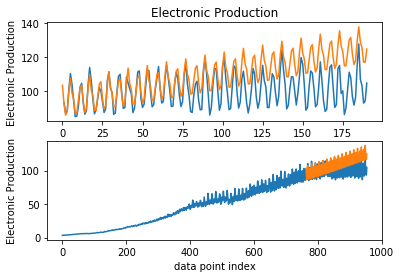

In [35]:
# plots and forecasting for electronic production
plot_data(data_electronic, "Electronic Production")
plot_seasonal(data_electronic, 12)
future_forecast_electronic = future_forecast(data_electronic, True, 12)
plot_future_forecast(data_electronic, future_forecast_electronic, 'Electronic Production')

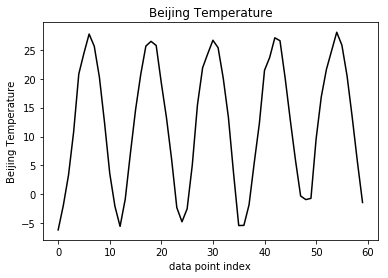

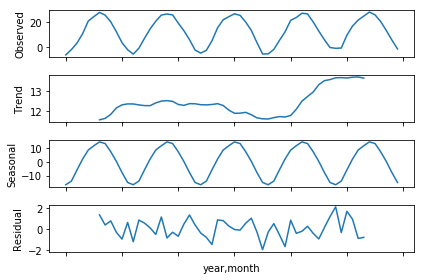

DEBUG::the size of test is:
(12,)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=148.322, BIC=151.432, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=145.034, BIC=151.255, Fit time=0.198 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=148.863, BIC=153.529, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=136.595, BIC=144.371, Fit time=0.952 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=137.590, BIC=143.812, Fit time=0.390 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=134.625, BIC=143.957, Fit time=0.798 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=

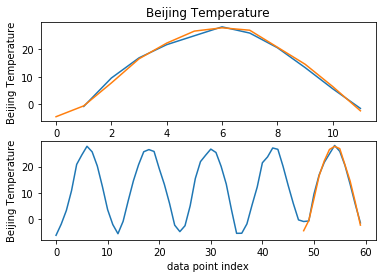

In [36]:
# plots and forecasting for Beijing weather data
plot_data(data_temp, "Beijing Temperature")
plot_seasonal(data_temp, 12)
future_forecast_temp = future_forecast(data_temp, True, 12)
plot_future_forecast(data_temp, future_forecast_temp, 'Beijing Temperature')

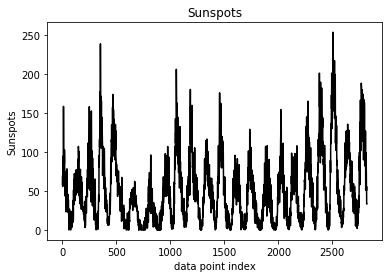

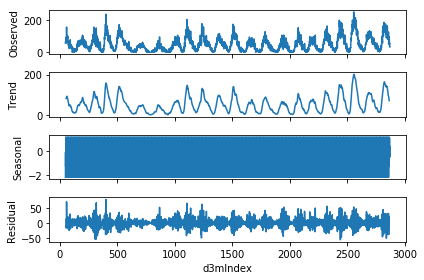

DEBUG::the size of test is:
(564,)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=18576.007, BIC=18604.585, Fit time=10.884 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=20449.877, BIC=20461.308, Fit time=0.167 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=19632.946, BIC=19655.808, Fit time=3.379 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=18608.715, BIC=18631.577, Fit time=5.743 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=18574.780, BIC=18609.074, Fit time=9.044 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=19413.342, BIC=19441.920, Fit time=5.697 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=18574.368, BIC=18614.377, Fit time=54.283 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=18608.909, BIC=18643.203, Fit time=24.521 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit tim

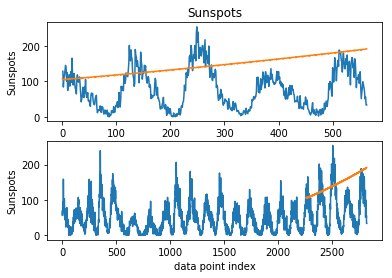

In [40]:
# plots and forecasting for sunspot data

plot_data(data_sun, "Sunspots")

# The solar cycle, which determines the number of observed sunspots has a period of 11 years
# (https://en.wikipedia.org/wiki/Solar_cycle). Therefore it's frequency (and its period for 
# seasonal differencing) is 12 observations/year * 11 years = 132.

# Unfortunately, a seasonal differencing period of 132 is too large to fit on ARIMA model (process
# is killed). This cell shows predictions for a period of 12, predictions are noticeably worse.

# CONCLUSION -> period of seasonal differencing is very important, it's important for user to understand the
# periodicity of their time series for good prediction
plot_seasonal(data_sun, 12)
future_forecast_sun = future_forecast(data_sun, True, 12)
plot_future_forecast(data_sun, future_forecast_sun, 'Sunspots')

AttributeError: 'Int64Index' object has no attribute 'inferred_freq'

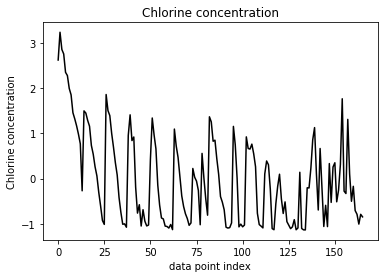

In [44]:
# plots and forecasting for Chlorine concentration data

# no information on periodicity of time series in dataset

plot_data(data_chl, "Chlorine concentration")
plot_seasonal(data_chl)
future_forecast_chl = future_forecast(data_chl, True)
plot_future_forecast(data_temp, future_forecast_chl, 'Chlorine concentration')